<a href="https://colab.research.google.com/github/sayarghoshroy/Extending_K-means/blob/master/Extending_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Extending K-means Clustering Algorithm

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color

In [0]:
# Two Lines: (a) y = x
#            (b) y = (-1).x
# We'll have n_a points on line_(a) and (1000 - n_a) = n_b points on line_(b)

In [0]:
n_a = 500 # to ensure uniform distribution on the 'x'
n_b = 1000 - n_a

x_a = (np.random.random(n_a) - np.ones(n_a) * 0.5) * 10
x_b = (np.random.random(n_b) - np.ones(n_b) * 0.5) * 10
y_a = x_a
y_b = (-1) * x_b
# The implementation is perfectly generic, any valid equation of the form 'y = m.x + c' can be used here

In [0]:
points_a = [ [x_a[i], y_a[i]] for i in range(n_a)]
points_b = [ [x_b[i], y_b[i]] for i in range(n_b)]
all_points = points_a + points_b

In [0]:
# Partitioning the data into 2 random subsets
set_A = []
set_B = []
for i in range(n_a + n_b):
    toss = np.random.random()
    if toss > 0.5:
        set_A.append(all_points[i])
    else:
        set_B.append(all_points[i])

In [0]:
def get_line(points):
    # getting the equation of a straight line for the subset of points
    eigvals, eigvecs = np.linalg.eig(np.cov(np.asarray(points).T))
    best_index = np.flip(np.argsort(eigvals))[0]
    vec = eigvecs[best_index]
    mean = np.mean(np.asarray(points), axis = 1)
    params = {'direction': vec, 'centre': mean}
    # Expressing equation in form y = mx + c
    m = vec[1] / vec[0]
    c = mean[1] - m * mean[0]
    return {'m': m, 'c': c}

In [0]:
def distance(line, point):
    # compute distance from point to the line
    # line is a dictionary of the form {'m': _, 'c': _}
    return np.abs(line['c'] + line['m'] * point[0] - point[1]) / np.sqrt(1 + np.power(line['m'], 2))

In [0]:
num_iter = 0
max_iter = 10000

while num_iter < max_iter:
    num_iter += 1
    if(len(set_A) == 0 or len(set_B) == 0):
        # all points have been placed into a single cluster
        break
    
    line_A = get_line(set_A)
    line_B = get_line(set_B)
    # fitting staright lines for subsets A and B
    new_A = []
    new_B = []
    
    for point in all_points:
        dist_A = distance(line_A, point)
        dist_B = distance(line_B, point)
        
        # re-assigning points based on distance from their representative line
        if dist_A < dist_B:
            new_A.append(point)
        else:
            new_B.append(point)
    
    if set_A == new_A or set_A == new_B:
        # convergence achieved
        # set_A == new_B takes care of cluster renaming
        break
    
    set_A = new_A
    set_B = new_B

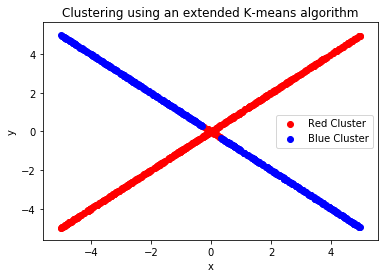

In [0]:
# Plotting the results of the clustering
plt.figure()
plt.title('Clustering using an extended K-means algorithm')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter([i[0] for i in set_A], [i[1] for i in set_A], color = 'red', label = 'Red Cluster')
plt.scatter([i[0] for i in set_B], [i[1] for i in set_B], color = 'blue', label = 'Blue Cluster')
plt.legend()
plt.show()

In [0]:
print("The final straight lines found:")
line_red = get_line(set_A)
line_blue = get_line(set_B)
print(line_red)
print(line_blue)

The final straight lines found:
{'m': -1.0000064843373864, 'c': 0.5822311646342548}
{'m': 1.0, 'c': 0.0}


In [0]:
# The number of iterations needed for convergence vary greatly
# with the random creation of set_A and set_B from all_points

In [0]:
# Thank You ^_^